# Getting Started

## How to Change a CPU Script to Run on the GPU with a Few Lines of Code

The following example shows how to easily switch calculations from CPU to GPU device with a few lines of code.

Take a look at the original example. Two matrices are allocated on a CPU device using the NumPy* array function. All further calculations are done on the allocated CPU device as well.

In [3]:
# Original CPU script

# Call numpy library
import numpy as np

# Data alocated on the CPU device
x = np.array([[1, 1], [1, 1]])
y = np.array([[1, 1], [1, 1]])

# Compute performed on the CPU device, where data is allocated
res = np.matmul(x, y)

print ("res = ", res)

res =  [[2 2]
 [2 2]]


Now try to modify the code so that all the calculations happen on the GPU device. 
To do this, go to the dpnp library and look at the result.

Change the line:

In [ ]:
# Call numpy library
import numpy as np

To the line:

In [ ]:
# Call dpnp library
import dpnp as np

The result is:

In [1]:
# Modified XPU script

# Drop-in replacement via single line change
import dpnp as np

# Data alocated on default SYCL device
x = np.array([[1, 1], [1, 1]])
y = np.array([[1, 1], [1, 1]])

# Compute performed on the device, where data is allocated
res = np.matmul(x, y)


print ("Array x is located on the device:", x.device)
print ("Array y is located on the device:", y.device)
print ("res is located on the device:", res.device)
print ("res = ", res)

Array x is located on the device: Device(level_zero:gpu:0)
Array y is located on the device: Device(level_zero:gpu:0)
res is located on the device: Device(level_zero:gpu:0)
res =  [[2 2]
 [2 2]]


As you see, changing only one line of code helps to perform all calculations on the GPU device.
In this example, ``np.array()`` creates an array on the default SYCL* device that is "gpu" on systems with integrated or discrete GPU. It is a host on systems that do not have GPU. The queue associated with this array is now carried with x and y. ``np.matmul(x, y)`` does matrix product of two arrays x and y, and respective pre-compiled kernel implementing ``np.matmul()`` is submitted to that queue. The result is allocated on the device array associated with that queue.

## Manage Device and Host Data with the Data Parallel Extension for NumPy* Library

For example, draw the function ``f(x) = sin(x)``.

Prerequisites: ``matplotlib`` library.

Let's see how we can control and specify the same device on which we want to perform our calculations and which USM memory type to use.
By default, the Data Parallel Extension for NumPy* library creates the default SYCL* device on a GPU on systems with integrated or discreted GPU. It is a host on systems that do not have GPU. In this case, the device is ``"Device(level_zero:gpu:0)``.
The Unified Shared Memory (USM) is allocated by default on the device you created the data. 

In [ ]:
x = np.linspace(-10.0, np.pi, 100, dtype=np.float32)

However, there are some cases when you need to stream a read-only data from the host to the device once or locate the data in both places: the host and the device (copies are synchronized by underlying software).

In this case, share the copy of data between host and device to draw the data using the ``matplotlib`` library more efficiently.
To do this, use the ``usm_type`` parameter.

In [ ]:
x = np.linspace(-10.0, np.pi, 100, dtype=np.float32, usm_type='shared')

The data are synchronized between the host and the device.

'x' allocated on the device: Device(level_zero:gpu:0)
'y' allocated on the device: Device(level_zero:gpu:0)


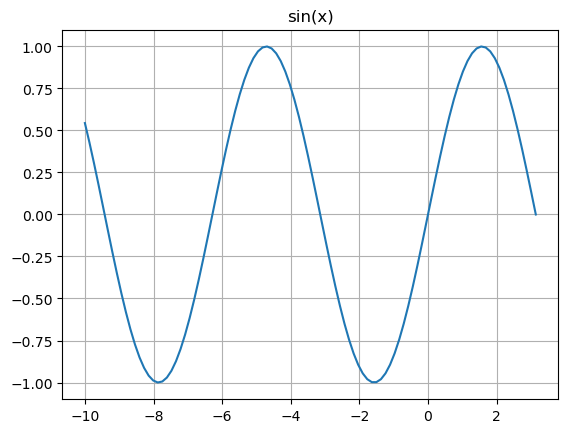

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import dpnp as np

# create an area for a graphic
x = np.linspace(-10.0, np.pi, 100, dtype=np.float32, usm_type='shared')
y = np.sin(x)
# print the information which SYCL* device is using
print("'x' allocated on the device:", x.device)
print("'y' allocated on the device:", y.device)


# draw the graphic
plt.title('sin(x)')
plt.plot(x, y)
plt.grid(True)

## Manage Devices with the Data Parallel Control Library

Below you can find a list of simple examples that explain how to figure out how many devices you have on your system and how to work with them. 


To display a list of all available SYCL devices, run:

In [5]:
# See the list of available SYCL platforms and extra metadata about each platform.
import dpctl

dpctl.lsplatform()  # Print platform information

Intel(R) OpenCL HD Graphics OpenCL 3.0 
Intel(R) FPGA Emulation Platform for OpenCL(TM) OpenCL 1.2 Intel(R) FPGA SDK for OpenCL(TM), Version 20.3
Intel(R) OpenCL OpenCL 3.0 WINDOWS
Intel(R) Level-Zero 1.3


Let's take a look at the output. 
On the platform used for this example, you can see: the OpenCL GPU driver, the Intel(R) FPGA Emulation Device, the Intel(R) OpenCL CPU driver, and the Intel(R) Level Zero GPU driver. 

If you change the verbocity parameter, you can get more information about the available devices:

In [6]:
# See the list of available SYCL platforms and extra metadata about each platform.
import dpctl

dpctl.lsplatform(2)  # Print platform information with verbocity level 2 (highest level)

Platform  0 ::
    Name        Intel(R) OpenCL HD Graphics
    Version     OpenCL 3.0 
    Vendor      Intel(R) Corporation
    Backend     opencl
    Num Devices 1
      # 0
        Name                Intel(R) Iris(R) Xe Graphics
        Version             31.0.101.3430
        Filter string       opencl:gpu:0
Platform  1 ::
    Name        Intel(R) FPGA Emulation Platform for OpenCL(TM)
    Version     OpenCL 1.2 Intel(R) FPGA SDK for OpenCL(TM), Version 20.3
    Vendor      Intel(R) Corporation
    Backend     opencl
    Num Devices 1
      # 0
        Name                Intel(R) FPGA Emulation Device
        Version             2022.15.11.0.18_160000
        Filter string       opencl:accelerator:0
Platform  2 ::
    Name        Intel(R) OpenCL
    Version     OpenCL 3.0 WINDOWS
    Vendor      Intel(R) Corporation
    Backend     opencl
    Num Devices 1
      # 0
        Name                11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz
        Version             2022.15.11.0

Knowing the available SYCL platforms, you can specify what type of device you want to work with:

In [3]:
# See the list of available gpu devices and their extra metadata.
import dpctl

if dpctl.has_gpu_devices():
    print (dpctl.get_devices(device_type='gpu'))
else:
    print("GPU device is not available")

[<dpctl.SyclDevice [backend_type.opencl, device_type.gpu,  Intel(R) Iris(R) Xe Graphics] at 0x1a1eddd72f0>, <dpctl.SyclDevice [backend_type.level_zero, device_type.gpu,  Intel(R) Iris(R) Xe Graphics] at 0x1a1eddd70f0>]


In [7]:
# See the list of available gpu devices and their extra metadata.
import dpctl

if dpctl.has_cpu_devices():
    print (dpctl.get_devices(device_type='cpu'))
else:
    print("CPU device is not available")

[<dpctl.SyclDevice [backend_type.opencl, device_type.cpu,  11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz] at 0x1779083bcf0>]


You can also make a specific device selection on your system using the default selector:

In [9]:
import dpctl

try:
    # Create a SyclDevice of type GPU based on whatever is returned
    # by the SYCL `gpu_selector` device selector class.
    gpu = dpctl.select_gpu_device()
    gpu.print_device_info() # print GPU device information

except:
    print ("GPU device is not available")

    Name            Intel(R) Iris(R) Xe Graphics
    Driver version  1.3.23904
    Vendor          Intel(R) Corporation
    Filter string   level_zero:gpu:0



Or, using the infromation in the filter string of the device, create an explicit SyclDevice:

In [7]:
import dpctl

# Create a SyclDevice with an explicit filter string,
# in this case the first level_zero gpu device.
try:
    level_zero_gpu = dpctl.SyclDevice("level_zero:gpu:0")
    level_zero_gpu.print_device_info()
except:
    print("The first level_zero GPU device is not available")    

    Name            Intel(R) Iris(R) Xe Graphics
    Driver version  1.3.23904
    Vendor          Intel(R) Corporation
    Profile         FULL_PROFILE
    Filter string   level_zero:gpu:0



Let's check if your GPU device supports double precision. 

To do this, you need to identify the GPU device and check the ``has_aspect_fp64`` parameter:

In [16]:
import dpctl
# Select GPU device and check double precision support
try:
    gpu = dpctl.select_gpu_device()
    gpu.print_device_info()
    print("Double precision support is", gpu.has_aspect_fp64)
except:
    print("The GPU device is not available")   

    Name            Intel(R) Iris(R) Xe Graphics
    Driver version  1.3.23904
    Vendor          Intel(R) Corporation
    Filter string   level_zero:gpu:0

Double precision support is False


As you can see, the tested GPU device has no support for the double precision.